In [2]:
import sys
sys.path.insert(0,'/home/djl34/kl_git/scripts')
from notebook_imports import *

/home/djl34/mambaforge/envs/raklette/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(


In [3]:
client = Client()

In [4]:
type = "kl/pseudocount_10"

filename = os.path.join(KL_data_dir, f"results/footprints/zscore/denovo_results/{type}.tsv")

In [5]:
df = pd.read_csv(filename, sep = "\t")

[None]

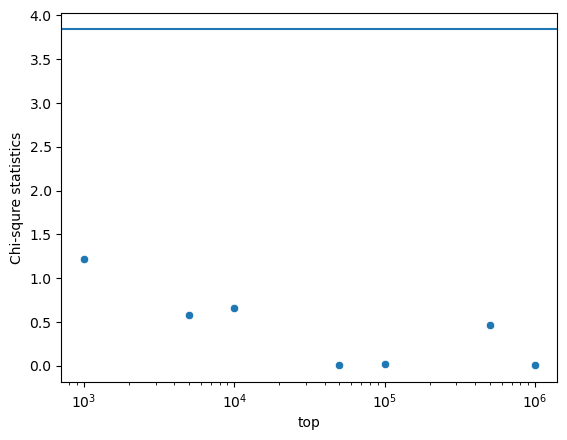

In [6]:
g = sns.scatterplot(data=df, x="top", y="Chi-squre statistics")

plt.axhline(y=3.84) 

g.set(xscale="log")

[None]

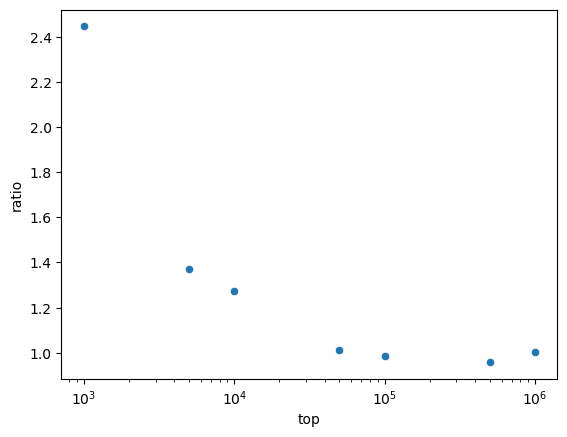

In [7]:
g = sns.scatterplot(data=df, x="top", y="ratio")
g.set(xscale="log")

In [8]:
df

,Unnamed: 0,ratio,Chi-squre statistics,P-value,average sites,average mu,top
0,0,2.445226,1.219110,0.269535,400.623000,37.982651,1000
1,1,1.369631,0.580002,0.446312,209.291800,19.602067,5000
2,2,1.272416,0.655164,0.418272,170.858200,15.741173,10000
3,3,1.011683,0.005759,0.939506,116.764040,10.357480,50000
4,4,0.983238,0.020355,0.886550,101.166120,8.883083,100000
5,5,0.957405,0.468866,0.493509,72.062520,6.268270,500000
6,6,1.003377,0.004291,0.947770,61.636876,5.356109,1000000
